### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [12]:
# Diccionario de tiendas
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calcular e imprimir ingresos totales
print("Ingresos totales por tienda:")
ingresos_totales = {}  # Opcional, para guardar los resultados

for nombre, datos in tiendas.items():
    ingreso_total = datos["Precio"].sum()
    ingresos_totales[nombre] = ingreso_total  # Guardar si se necesita luego
    print(f"{nombre}: ${ingreso_total:,.0f}")


Ingresos totales por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


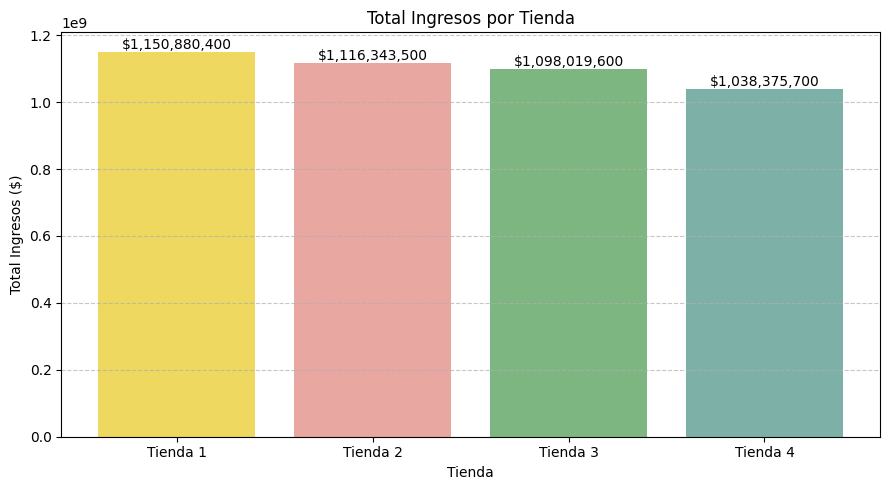

In [13]:
# Gráfico de Total Ingresos por Tienda
# Usamos el diccionario 'ingresos_totales' ya generado anteriormente
tiendas = list(ingresos_totales.keys())
ingresos = list(ingresos_totales.values())
colores = ['#eed860', '#e8a7a1', '#7db680', '#7db0a7']

# Crear gráfico
plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, ingresos, color=colores)
plt.title('Total Ingresos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Total Ingresos ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

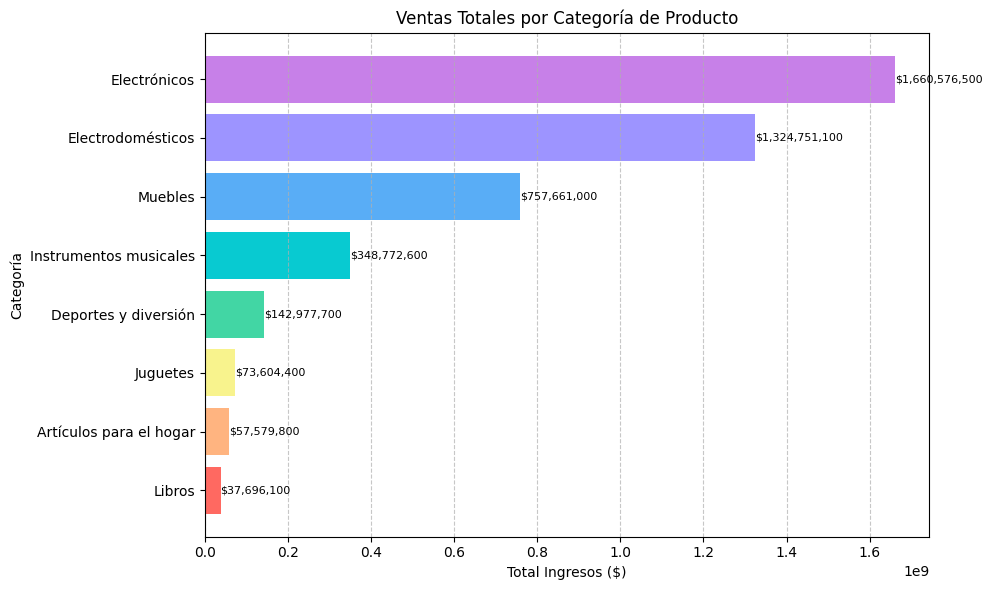

In [7]:
#Gráfico Ventas Totales por Categoría de Producto
# Consolidar datos de todas las tiendas en un DataFrame
datos_consolidados = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por categoría y sumar los precios
ventas_x_categoria = datos_consolidados.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

# Generando gráfico
plt.figure(figsize=(10, 6))
colors = ['#c780e8', '#9d94ff', '#59adf6', '#08cad1', '#42d6a4', '#f8f38d', '#ffb480', '#ff6961']
barras = plt.barh(ventas_x_categoria.index, ventas_x_categoria.values, color=colors)
# barras = plt.barh(ventas_x_categoria.index, ventas_x_categoria.values, color='#0496FF')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Total Ingresos ($)')
plt.ylabel('Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Para que la categoría con más ventas quede arriba

# Etiquetas para las barras
for barra in barras:
    xval = barra.get_width()
    plt.text(xval + 10000, barra.get_y() + barra.get_height()/2, f"${xval:,.0f}", va='center', fontsize=8)

plt.tight_layout()
plt.show()

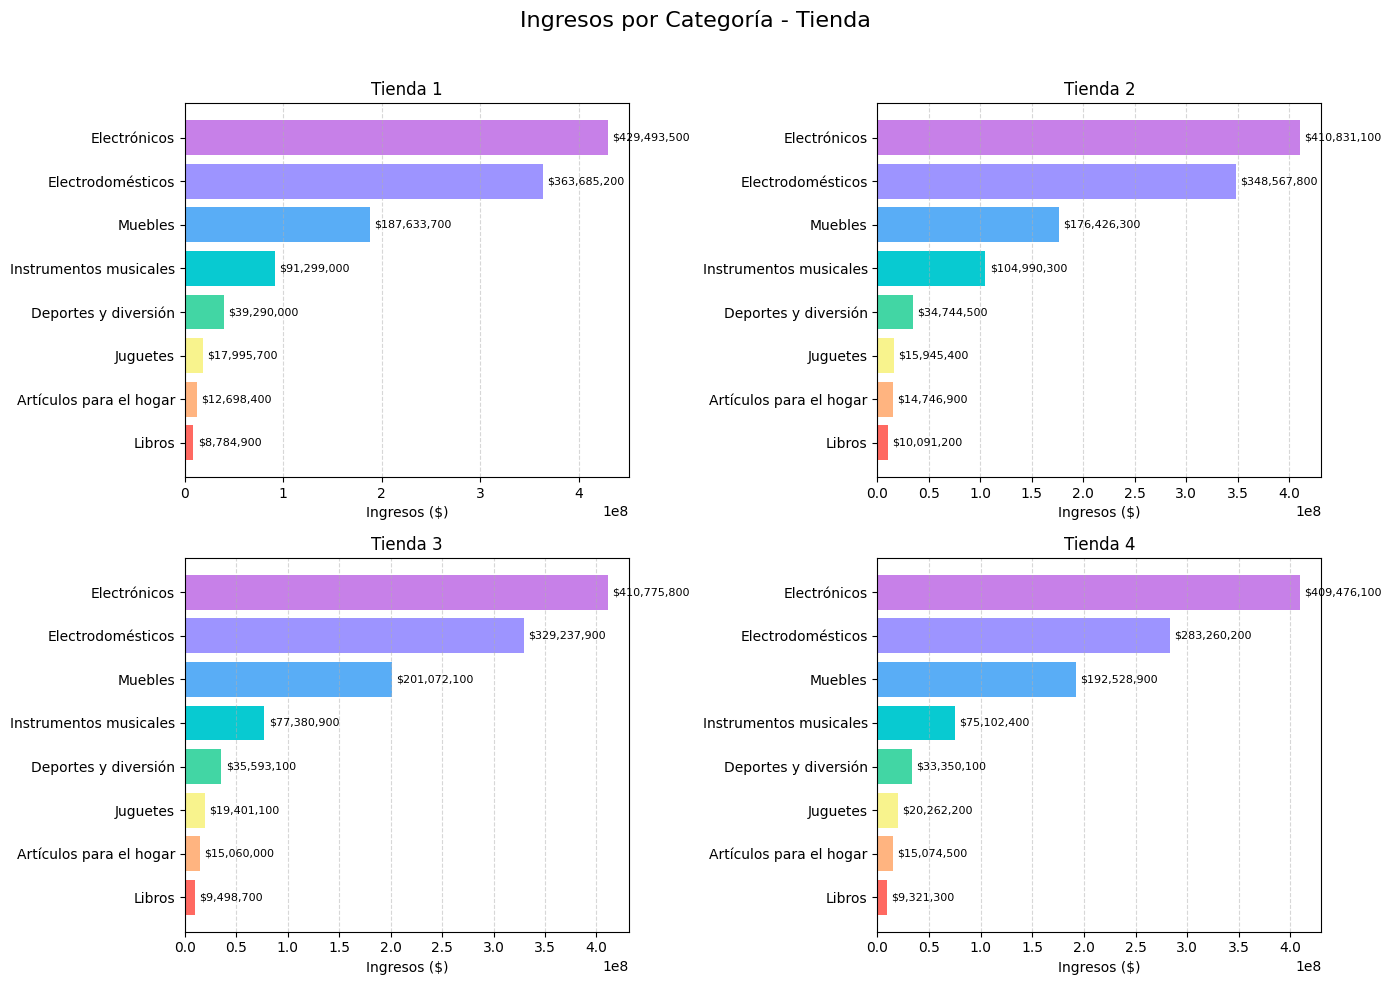

In [14]:
# Grafico Ingresos por Categoría - Tienda
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
tiendas_data = [tienda1, tienda2, tienda3, tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, ax in enumerate(axes.flatten()):
    categoria = tiendas_data[i].groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=True)
    colores = ['#ff6961', '#ffb480', '#f8f38d', '#42d6a4', '#08cad1', '#59adf6', '#9d94ff', '#c780e8']
    barras = ax.barh(categoria.index, categoria.values, color=colores)
    ax.set_title(tiendas[i])
    ax.set_xlabel('Ingresos ($)')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Etiquetas para las barras
    for barra in barras:
        valor = barra.get_width()
        ax.text(valor + max(categoria.values)*0.01,  # desplazamiento a la derecha
                barra.get_y() + barra.get_height() / 2,
                f"${valor:,.0f}", va='center', fontsize=8)

plt.suptitle('Ingresos por Categoría - Tienda', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Calificación Promedio por Tienda
# Diccionario con las tiendas
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calcular y mostrar calificación promedio
for nombre, datos in tiendas.items():
    score_promedio = datos["Calificación"].mean()
    print(f"Calificación promedio de {nombre}: {score_promedio:.2f}")


Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.00


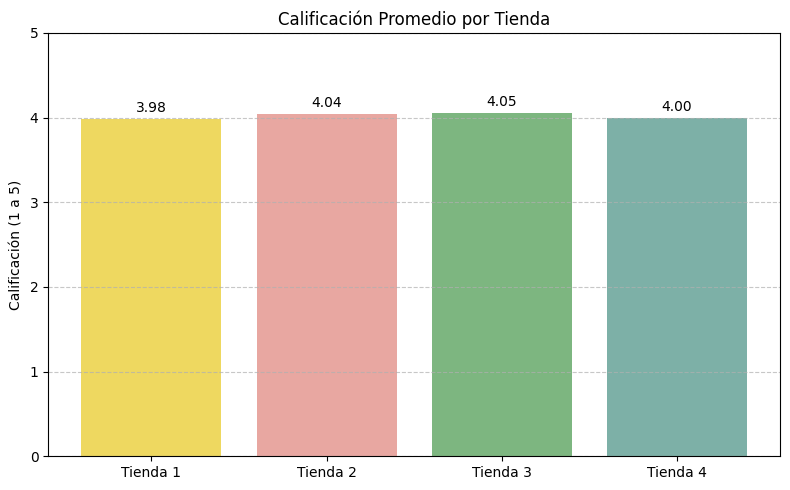

In [ ]:
# Grafico para Calificación Promedio por Tienda
import matplotlib.pyplot as plt

# Diccionario de tiendas con sus DataFrames
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Obtener Nombres y Calificaciones promedio
nombres = list(tiendas.keys())
calificaciones = [datos["Calificación"].mean() for datos in tiendas.values()]
colores = ['#eed860', '#e8a7a1', '#7db680', '#7db0a7']  # Colores personalizados

# Creación del gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(nombres, calificaciones, color=colores)
plt.title('Calificación Promedio por Tienda')
plt.ylim(0, 5)
plt.ylabel('Calificación (1 a 5)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Top 5 Productos más Vendidos por Tienda
# Diccionario de tiendas
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Mostrar top 5 productos por tienda
for nombre, datos in tiendas.items():
    top5 = datos["Producto"].value_counts().head(5)
    print(f"\nTop 5 productos más vendidos - {nombre}:\n{top5}")



Top 5 productos más vendidos - Tienda 1:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Top 5 productos más vendidos - Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Top 5 productos más vendidos - Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Top 5 productos más vendidos - Tienda 4:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


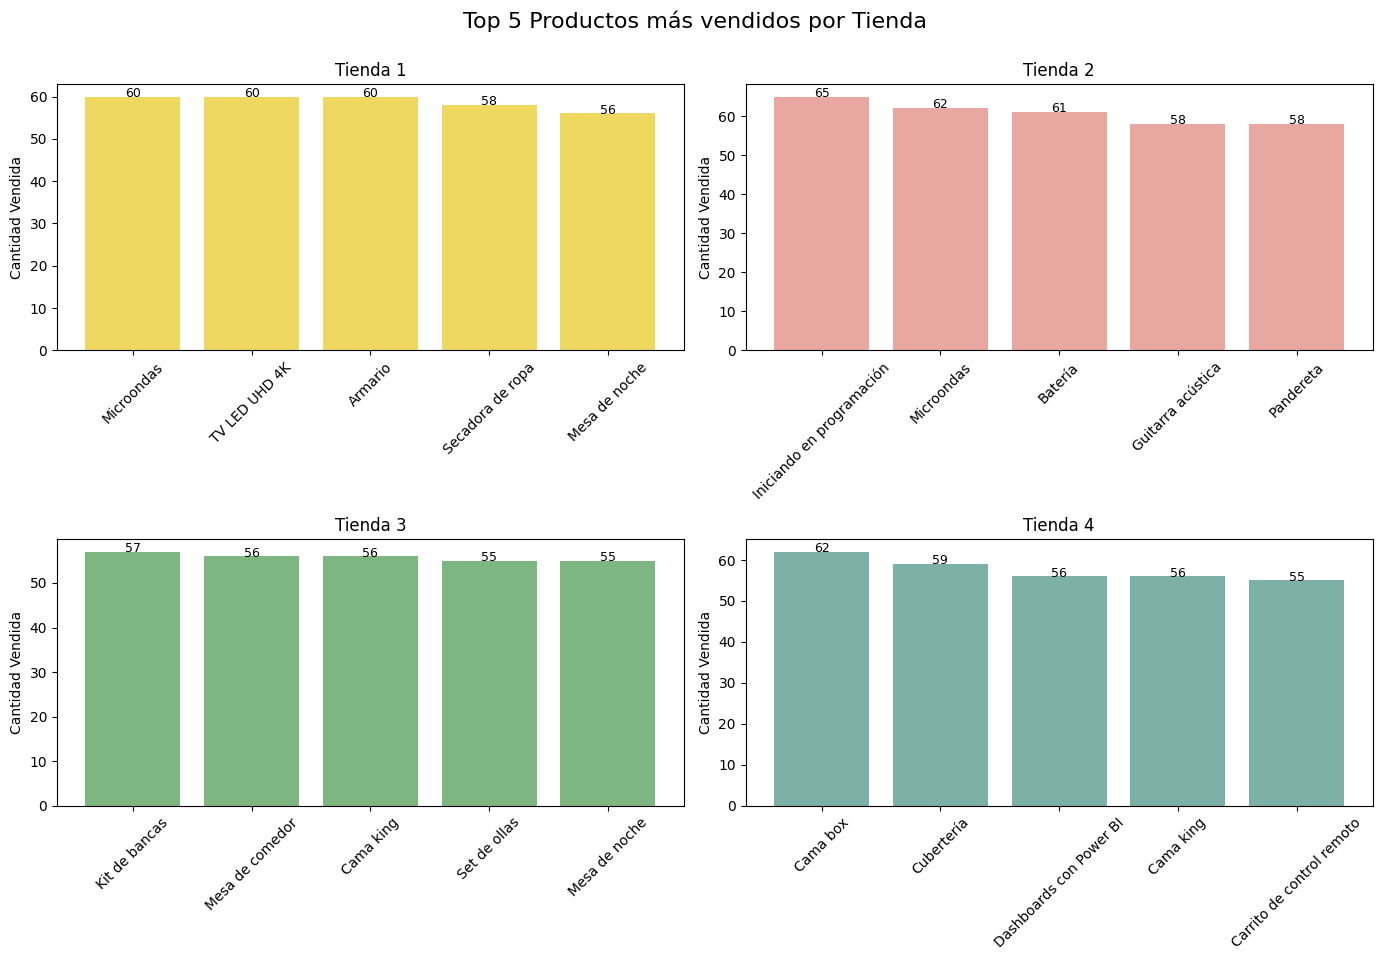

In [ ]:
# Gráfico Top 5 Productos más Vendidos por Tienda
import matplotlib.pyplot as plt

# Diccionario de tiendas con sus DataFrames
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Colores personalizados para cada tienda
colores = ['#eed860', '#e8a7a1', '#7db680', '#7db0a7']

# Crear figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Top 5 Productos más vendidos por Tienda", fontsize=16)

# Aplanar los ejes para iterar fácilmente
axs = axs.flatten()

# Recorrer tiendas y crear gráficos
for i, (nombre, datos) in enumerate(tiendas.items()):
    top5 = datos["Producto"].value_counts().head(5)
    barras = axs[i].bar(top5.index, top5.values, color=colores[i])
    axs[i].set_title(nombre)
    axs[i].set_ylabel("Cantidad Vendida")
    axs[i].tick_params(axis='x', rotation=45)

    # Agregar etiquetas a cada barra
    for barra in barras:
        yval = barra.get_height()
        axs[i].text(
            barra.get_x() + barra.get_width() / 2,
            yval + -0.8,  # etiquetas por debajo
            f"{int(yval)}",  # mostrar como número entero
            ha='center',
            va='bottom',
            fontsize=9
        )
plt.tight_layout(rect=[0, 0.025, 1, 0.98])  # Espaciado entre graficos
plt.show()

In [9]:
# Top 5 Productos menos Vendidos por Tienda
# Diccionario de tiendas
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Mostrar top 5 productos menos vendidos por tienda
for nombre, datos in tiendas.items():
    bottom5 = datos["Producto"].value_counts().tail(5)
    print(f"\nTop 5 productos menos vendidos - {nombre}:\n{bottom5}")


Top 5 productos menos vendidos - Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Top 5 productos menos vendidos - Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Top 5 productos menos vendidos - Tienda 3:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Top 5 productos menos vendidos - Tienda 4:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


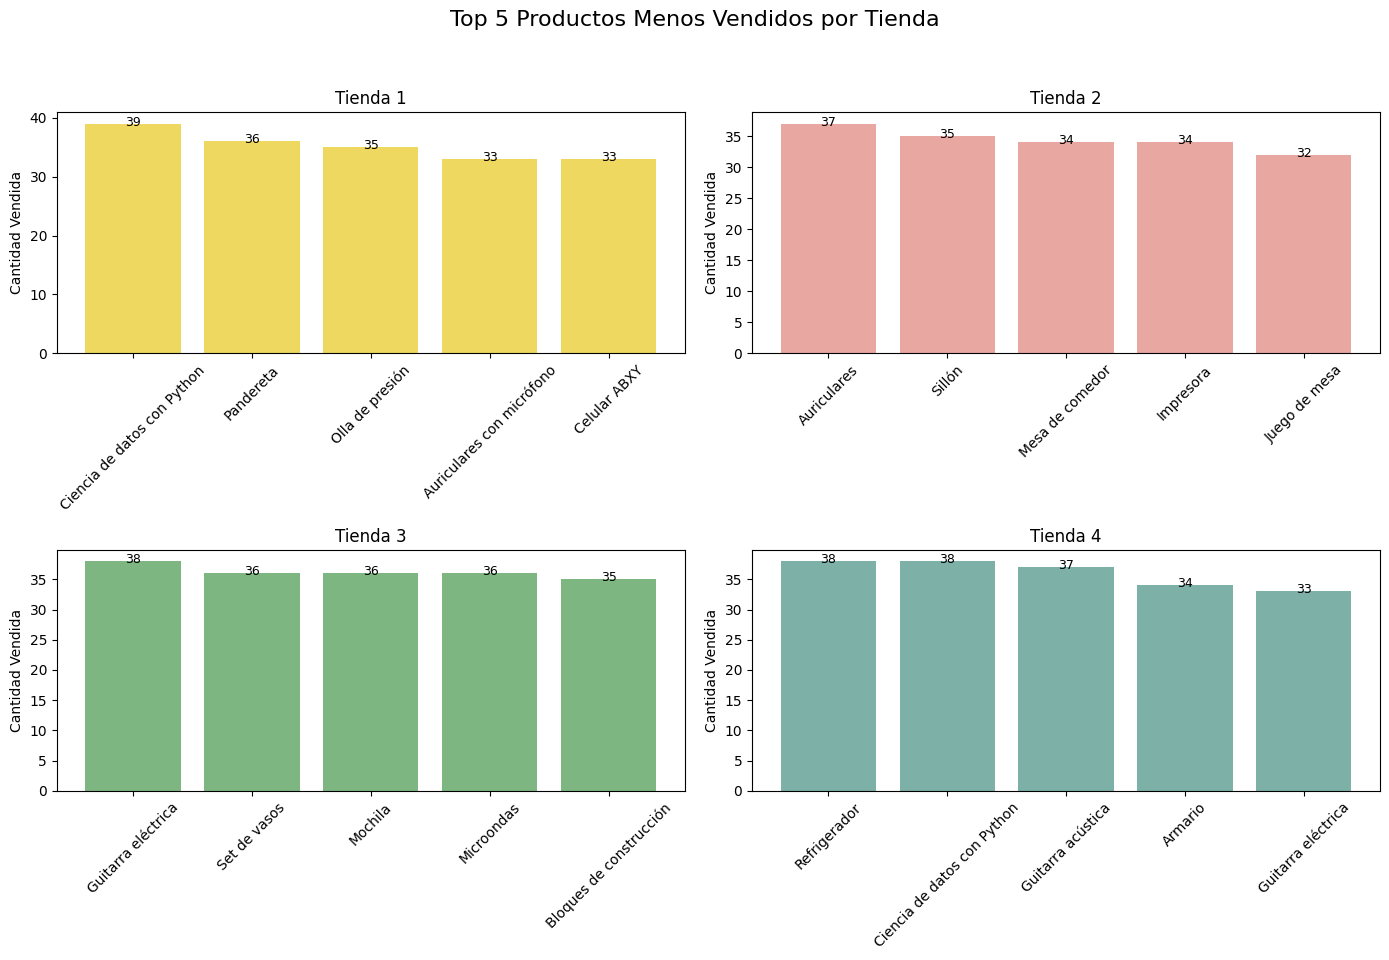

In [10]:
# Gráfico Top 5 Productos Menos Vendidos por Tienda
import matplotlib.pyplot as plt

# Diccionario de tiendas con sus DataFrames
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Colores personalizados para cada tienda
colores = ['#eed860', '#e8a7a1', '#7db680', '#7db0a7']

# Crear figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Top 5 Productos Menos Vendidos por Tienda", fontsize=16)

# Aplanar los ejes para iterar fácilmente
axs = axs.flatten()

# Recorrer tiendas y crear gráficos
for i, (nombre, datos) in enumerate(tiendas.items()):
    bottom5 = datos["Producto"].value_counts().tail(5)
    barras = axs[i].bar(bottom5.index, bottom5.values, color=colores[i])
    axs[i].set_title(nombre)
    axs[i].set_ylabel("Cantidad Vendida")
    axs[i].tick_params(axis='x', rotation=45)

    # Agregar etiquetas a cada barra
    for barra in barras:
        yval = barra.get_height()
        axs[i].text(
            barra.get_x() + barra.get_width() / 2,
            yval + -0.8,  # encima de la barra
            f"{int(yval)}",
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout(rect=[0, 0.025, 1, 0.95])
plt.show()


# 5. Envío promedio por tienda




In [20]:
# Diccionario con las tiendas
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calcular e imprimir el envío promedio por tienda
for nombre, datos in tiendas.items():
    envio_prom = datos["Costo de envío"].mean()
    print(f"Envío promedio de {nombre}: ${envio_prom:,.2f}")


Envío promedio de Tienda 1: $26,018.61
Envío promedio de Tienda 2: $25,216.24
Envío promedio de Tienda 3: $24,805.68
Envío promedio de Tienda 4: $23,459.46


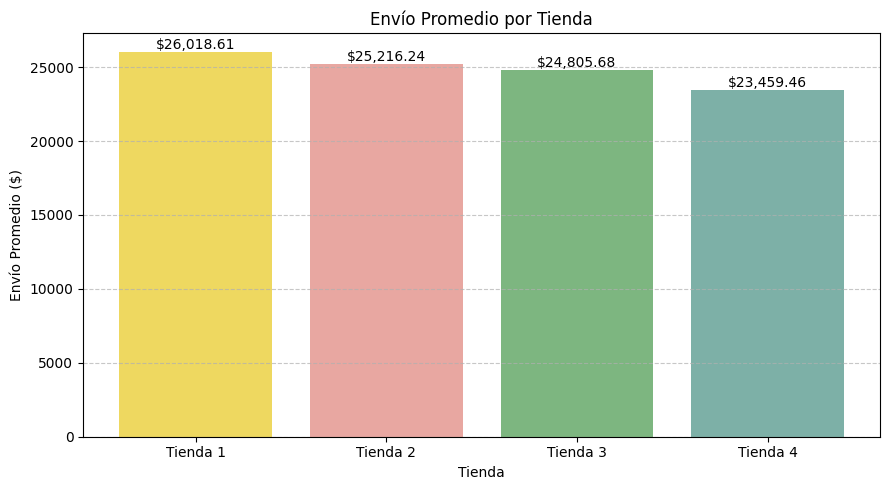

In [19]:
# Grafico para envío promedio por tienda
import matplotlib.pyplot as plt

# Diccionario de tiendas y sus DataFrames
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Colores personalizados
colores = ['#eed860', '#e8a7a1', '#7db680', '#7db0a7']

# Calcular envío promedio por tienda
nombres_tiendas = []
envios_promedio = []

for nombre, datos in tiendas.items():
    nombres_tiendas.append(nombre)
    envios_promedio.append(datos["Costo de envío"].mean())

# Crear gráfico de barras
plt.figure(figsize=(9, 5))
barras = plt.bar(nombres_tiendas, envios_promedio, color=colores)
plt.title('Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Envío Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas en las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, yval + 0.05, f"${yval:,.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [26]:
# Lista de DataFrames de tiendas
dataframes_tiendas = [tienda1, tienda2, tienda3, tienda4]

# Crear diccionario con nombre, data y cálculo de ingresos
tiendas = {
    f"Tienda {i+1}": {
        "data": df,
        "ingresos": df["Precio"].sum()
    }
    for i, df in enumerate(dataframes_tiendas)
}

# Calcular rentabilidad por tienda
rentabilidades = {
    nombre: info["ingresos"] - info["data"]["Costo de envío"].sum()
    for nombre, info in tiendas.items()
}

# Imprimir rentabilidad de todas las tiendas
print("Rentabilidad por tienda:")
for nombre, valor in rentabilidades.items():
    print(f"{nombre}: ${valor:,.0f}")

# Encontrar tienda menos rentable
tienda_menos_rentable = min(rentabilidades, key=rentabilidades.get)
rentabilidad_menos_rentable = rentabilidades[tienda_menos_rentable]

print(f"\nLa tienda menos rentable es: {tienda_menos_rentable} con una rentabilidad de ${rentabilidad_menos_rentable:,.0f}")


Rentabilidad por tienda:
Tienda 1: $1,089,502,500
Tienda 2: $1,056,858,400
Tienda 3: $1,039,503,000
Tienda 4: $983,058,300

La tienda menos rentable es: Tienda 4 con una rentabilidad de $983,058,300


# 6. Informe Final

**Diagnóstico: Análisis de Datos y Evaluación del Rendimiento**

Se llevó a cabo un análisis de datos con indicadores clave como ingresos por tienda, número de ventas, ticket promedio, cantidad de productos vendidos y rendimiento mensual.

**Principales hallazgos:**

Tiendas con mejor rendimiento:


**Tiendas 1, 2 y 3** mostraron estabilidad en ventas, ticket promedio competitivo y *mayores ingresos totales.*

**Tienda 4** Presenta los siguientes puntos críticos:

* Menor ingreso total.  
* Menor ingresos por categoría.  
* Menor rentabilidad.  

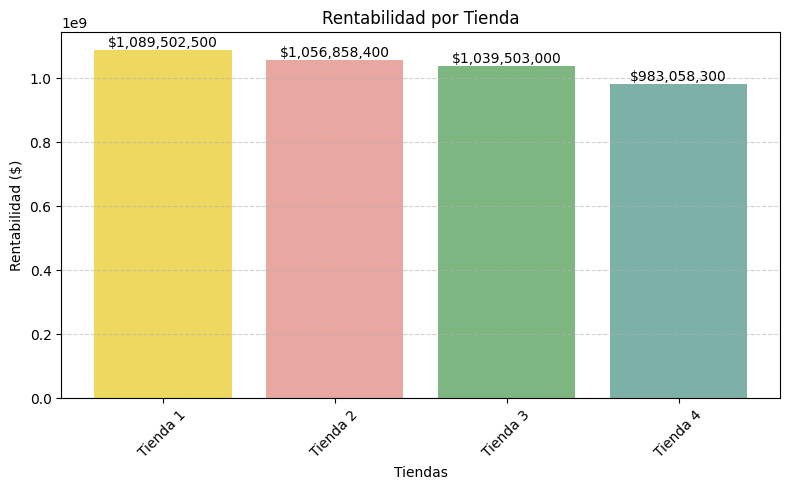

In [29]:
# Gráfico de Rentabilidad por Tienda
import matplotlib.pyplot as plt

# Datos
nombres_tiendas = list(rentabilidades.keys())
valores_rentabilidad = list(rentabilidades.values())
colores_personalizados = ['#eed860', '#e8a7a1', '#7db680', '#7db0a7']

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(nombres_tiendas, valores_rentabilidad, color=colores_personalizados)

# Agregar título y etiquetas
plt.title('Rentabilidad por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Rentabilidad ($)')
plt.xticks(rotation=45)

# Etiquetas en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 7. Conclusión
El gráfico de ingresos totales muestra que la Tienda 4 genera los ingresos más bajos, con ingresos de  1,038,375,700 y con una rentabilidad de $983,058,300 siendo inferior a las demas tiendas.

Con base en el análisis de datos, **se recomienda el cierre de la Tienda 4** como una estrategia para:

1. **Reducir los costos operativos** derivados de una tienda con bajo rendimiento.
2. **Reasignar recursos** (humanos, logísticos, de inventario) a las tiendas más rentables.
3.   **Potenciar la estrategia digital** en las tiendas con mayor estabilidad y crecimiento.
4. **Optimizar la operación** para lograr una mayor rentabilidad.
Esta decisión contribuirá a mejorar la eficiencia general del negocio y fortalecerá la marca.

---

El objetivo de esta propuesta es **proteger la inversión y maximizar los esfuerzos** realizados durante años, mejorando su operación comercial. El cierre de la Tienda 4 no es una medida drástica, sino una estrategia respaldada por datos concretos, pensada para concentrar los esfuerzos en áreas con mayor retorno y oportunidades de expansión.

# 7. ¡Extra! Análisis del desempeño geográfico

In [15]:
# Gráfico de Ventas por Lugar de Compra
import folium
import pandas as pd

# Añadir columna 'Tienda' a cada DataFrame antes de unirlos
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todos los datos
datos_todas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por lat/lon y lugar de compra
agrupado = datos_todas.groupby(["lat", "lon", "Lugar de Compra"]).agg({
    "Precio": "sum",
    "Tienda": lambda x: ", ".join(sorted(set(x)))
}).reset_index()

# Crear mapa
mapa = folium.Map(location=[agrupado["lat"].mean(), agrupado["lon"].mean()], zoom_start=5)

# Añadir puntos con tooltip y popup
for _, fila in agrupado.iterrows():
    ingresos = fila["Precio"]

    folium.CircleMarker(
        location=[fila["lat"], fila["lon"]],
        radius=min(max(ingresos / 1000, 3), 10),
        popup=folium.Popup(
            html=f"""
            <strong>Ubicación:</strong> {fila['Lugar de Compra']}<br>
            <strong>Tienda(s):</strong> {fila['Tienda']}<br>
            <strong>Ingresos Totales:</strong> ${ingresos:,.2f}
            """, max_width=300
        ),
        tooltip=f"{fila['Lugar de Compra']} - ${ingresos:,.0f}",
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(mapa)

mapa
